# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#comando usado para que los gráficos se muestren directamente dentro del notebook
%matplotlib inline

import keras
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout # type: ignore
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0) #le fijamos un valor a la semilla para que a todos los alumnos nos den los mismos valores aleatorios.

# Data

In [3]:
from keras.datasets import mnist  # type: ignore #importamos el dataset de imagenes

(x_train, y_train), (x_test, y_test) = mnist.load_data()  #devuelve una tupla de numpy arrays
#x_train: Una matriz que contiene las imágenes de entrenamiento.
#y_train: es un vector que contiene las etiquetas correspondientes a cada imagen de entrenamiento
#x_test: Una matriz que contiene las imágenes de prueba.
#y_test: Un vector que contiene las etiquetas correspondientes a las imágenes de prueba.

x_train.shape   #pedimos las dimensiones de la matriz.
# eso devuelve (60000, 28, 28) -> es decir  devuelve 60000 matrices de 28x28
# si hicieramos y_train.shape eso devuelve (60000,) es decir un vector con 60000 elemtos. En nuestro caso numeros etiquetando un 1, un 6,  un 4, etc..

(60000, 28, 28)

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

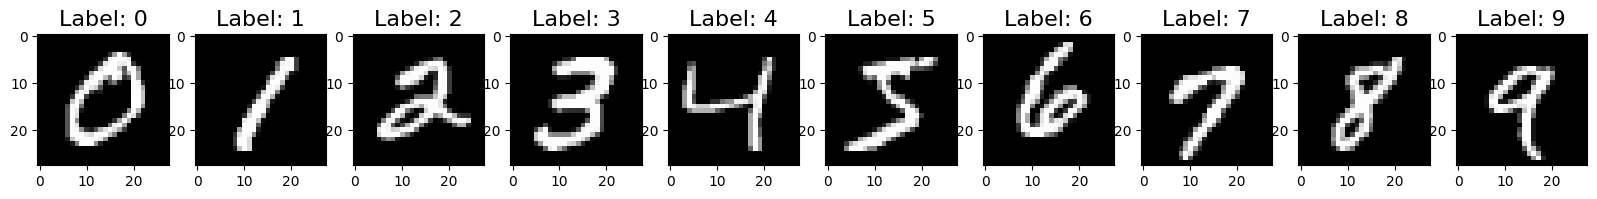

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
#plt.subplots(): Esta función de Matplotlib crea una fila y un conjunto de subplots dentro de ella.
#1, num_classes: Estos números indican que queremos crear una fila de subplots y que el número de columnas será igual a num_classes (en este caso, 10).
#figsize=(20, 20): Este argumento establece el tamaño de la figura en pulgadas, en este caso, 20 pulgadas de ancho por 20 pulgadas de alto.


for i in range(0, num_classes):
  sample = x_train[y_train == i][0]   # ver explicacion en el cuadro de comentarios de debajo.
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
# sample = x_train[y_train == i][0]    Aunque no hemos escrito explícitamente numpy en la instrucción y_train == i, NumPy está trabajando detrás de escena.
# Supongamos que tengo 5 fotos de números. Los números son 6,4,9,2 y 3
# En x_train tengo 5 matrices de 28x28 que indican el pixelado
# En y_train tengo lo dicho  6,4,9,2,3 que etqietan con esevalor a que corresponde cada  foto
# Si tengo la expresion
# for i in range(2, 5):
# minumeraco = x_train[y_train == i][0]
# hara lo siguiente en la primera vuelta
# y_train==2 contendra este vector booleano  [false, false, false, true, false] ya que en la instrucción y_train == i, NumPy está trabajando detrás de escena.
# podemos decir que x_train[[False, False, False, True, False]] es equivalente a "selecciona el elemento donde el vector booleano es True". Es decir, el 4º elemento.
# Al ponerle el [0] le decimos : “Y de todas las fotos que coinciden con un DOS seleccioname el primero”  es decir…. De todas mis fotos pillate la primera que sea un dos.

# Añadimos una sexta foto de un 2:
# •	x_train: Ahora tenemos 6 matrices de 28x28 píxeles.
# •	y_train: Se convierte en [6, 4, 9, 2, 3, 2].
# ¿Qué pasa si volvemos a ejecutar x_train[y_train == 2][0]?
# En este caso, la expresión y_train == 2 generaría el siguiente vector booleano:
# •	[False, False, False, True, False, True]
# Al tener dos valores True, significa que hay dos imágenes que corresponden al número 2. Sin embargo, al agregar [0] al final, estamos seleccionando específicamente la primera imagen que cumpla con la condición.
# Por lo tanto, en este nuevo escenario:
# •	x_train[y_train == 2][0] seguiría devolviendo la primera imagen del número 2 que encuentres en x_train, que en este caso sería la misma que antes de agregar la nueva foto.
# Si quisieras acceder a la segunda imagen del número 2, deberías usar un índice diferente:
# •	x_train[y_train == 2][1] te daría la segunda imagen del número 2.

#ax[0] te daría acceso a la primera subgráfica, ax[1] a la segunda, y así sucesivamente.
#imshow: Esta es una función de Matplotlib que se utiliza para mostrar una imagen.
#Toma como entrada una matriz numérica que representa los valores de los píxeles de la imagen.
#sample: Esta es la variable que contiene la matriz numérica con los datos de la imagen que quieres mostrar. Cada elemento de esta matriz corresponde a un píxel de la imagen.
#cmap='gray': Este argumento especifica el mapa de colores que se utilizará para visualizar la imagen. En este caso, 'gray' indica que la imagen se mostrará en escala de grises, es decir, en tonos de blanco y negro.




In [7]:
for i in range(10):
  print(y_train[i]) #escribimos en pantalla los primeros 10 valores de etiqueta de nuestras imagenes.

5
0
4
1
9
2
1
3
1
4


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)  #esto me saca el ONE_HOT DE LAS ETIQUETAS DE ENTRENAMIENTO
y_test = keras.utils.to_categorical(y_test, num_classes)  #esto me saca el ONE_HOT DE LAS ETIQUETAS DE TEST

In [9]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [10]:
# Normalize Data  CON ESTO HACEMOS QUE TOME VALORES ENTRE 0 Y 1
x_train = x_train / 255.0
x_test = x_test / 255.0
#CADA PIXEL TOMA VALORES ENTRE 0 Y 255. AL DIVIDIR CADA VALOR ENTRE 255 HARA QUE LOS VALORES OSCILEN ENTRE 0 Y 1. EJ 255/255 =1

In [11]:
# Reshape Data ESTO APLANA LA MATRIZ. EXPLICACION EN EL CUADRO DE COMENTARIOS DE DEBAJO
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [12]:
#x_train.reshape(): Esta función se utiliza para cambiar la forma de una matriz.
# x_train.shape[0]: Esto toma el número de filas de la matriz x_train, que generalmente representa el número de imágenes.
# -1: Este valor especial le indica a Python que calcule automáticamente el tamaño de la segunda dimensión para que todos los elementos de la matriz original queden aplanados en una sola fila.
# print(x_train.shape) ESO VA A IMPRIMIR (60000, 784) que significa 60000 vectores de 784 elementos
#para la imagen 1 podriamos tener esta ristra de 784 elementos  [0.0, 0.2, 1.0, 0.5, 0.0, 0.1, 0.0, 0.8, 0.3, 0.12, ..., 0.7, 0.9, 0.4]
#tendremos 60000 ristras de 784 elementos

# Create Model - Fully Connected Neural Network

In [13]:
model = Sequential()  #creamos un objeto de tipo modelo secuencial

model.add(Dense(units=128, input_shape=(784,), activation='relu'))  #añadimos una capa de 128 neuronas con una funcion de activacion tipo relu
#input_shape=(784,) le dice a la capa densa que espera recibir como entrada un vector plano (un array unidimensional) de 784 elementos.

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))  #para mejorar los calculos esta instruccion desactiva aleatoriamente un 25% de las neuronas de la capa anterior
model.add(Dense(units=10, activation='softmax')) #esta capa de 10 neuronas se forma con una funcion activacion de tipo softmax


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #compilamos el modelo
#categorical_crossentropy es una función de pérdida adecuada para problemas de clasificación multiclase
#usaremos el optimizador ADAM, digamos que adam es quien regula las perillas que ajustan los pesos.
#la métricas que se utilizará para evaluar el rendimiento del modelo en nuestro caso sera la precision (accuracy).
#la precision corresponde con la proporción de predicciones correctas que hace el modelo.


model.summary()  #esto muestra en pantall una descripcion de las capas

c:\Users\danie\Desktop\mnist IA\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train

In [14]:
#Definimos el tamaño del lote y las epocas para entrenar a nuestro modelo
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)
#como entradas toma a x_train como salidas toma a y_train  en lotes de 512 elementos y recorreremos 10 epocas

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6745 - loss: 1.0644
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9315 - loss: 0.2361
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9509 - loss: 0.1733
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9620 - loss: 0.1319
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.1128
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.0965
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9754 - loss: 0.0847
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9779 - loss: 0.0713
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.0638
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0575


# Evaluate

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
#vamos a evaluar al modelo con datos de entrada y salida que nunca ha visto x_test y_test
#esto nos devuelve una tupla con los datos de perdida y precision
#por ejemplo nos puede dar un Test Loss= 0.06893616169691086 y una test_acc = 0.9789999723434448
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9740 - loss: 0.0859
Test Loss: 0.07352659851312637, Test Accuracy: 0.9782999753952026


In [16]:
y_pred = model.predict(x_test)   #esto genera predicciones para los datos de prueba que no conoce
#devuelve un array DE PROBABILIDADES de ser un 0  o un 1 o un 2..... o un 9

y_pred_classes = np.argmax(y_pred, axis=1)  #devolverá un array de los índices del valor máximo de probabilidad para cada numero.
#Si por ejemplo uno de los numeros que devuelve fuera 2 significa
#que el modelo predice que esa imagen corresponde al indice 2 es decir... corresponde al numero 2. indice 0 -> numero 0  indice 1->numero 1....indice 9 ->numero 9
#axis=1 indica que queremos buscar el índice del valor máximo a lo largo de cada fila del array

print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
[[1.01749310e-06 9.05054833e-07 8.49654680e-05 ... 9.99816477e-01
  1.80787652e-06 3.20304352e-05]
 [2.86959136e-07 1.23953705e-05 9.99965429e-01 ... 3.45016282e-09
  1.05687309e-06 1.46620639e-12]
 [5.44575014e-05 9.95237827e-01 7.22795317e-04 ... 2.89535173e-03
  5.11862978e-04 2.82338933e-05]
 ...
 [5.81730532e-11 1.56345781e-09 3.68167630e-09 ... 1.54394420e-05
  1.93600016e-07 4.78340189e-05]
 [1.26967237e-07 8.82394488e-07 8.55412878e-08 ... 7.32537728e-08
  7.34723799e-05 2.80220132e-08]
 [1.20063541e-08 6.72694067e-10 5.49209176e-08 ... 2.33984759e-11
  9.03554509e-10 4.39834141e-11]]
[7 2 1 ... 4 5 6]


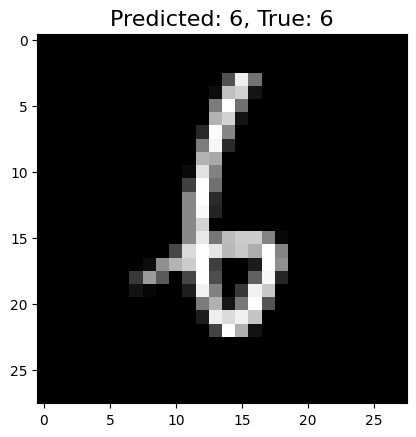

In [17]:
# Single Example
random_idx = np.random.choice(len(x_test)) #esto selecciona una imagen al azar del conjunto de prueba.
#Si random_idx = 27, entonces estaríamos seleccionando la imagen nº 28 de nuestro conjunto de prueba (ya que el primer índice es 0).

x_sample = x_test[random_idx]  #en nuestro ejemplo x_sample = x_test[27] corresponde con la imagen 28 de pruebas en el ejemplo que hemos elegido

y_true = np.argmax(y_test, axis=1) #esto devolvera un array con el mayor indice contenido en su correspondiente y_test
#pero... si y_test ya eran etiquetas y no probabilidades ¿Por qué hacemos esto con y_test?
#y_test generalmente contiene las etiquetas reales o verdaderas de nuestros datos de prueba. Estas etiquetas suelen estar codificadas
# como one-hot encoded, es decir, cada fila representa una muestra y tiene un 1 en la columna correspondiente a su clase y 0 en el resto.
# Encontrar el índice del valor máximo nos permite obtener la clase a la que pertenece cada muestra.
#Por ejemplo, si una fila de y_test es [0, 1, 0], el índice del valor máximo es 1, lo que indica que la muestra pertenece a la clase 1.
#EN RESUMEN y_true A LA HORA DE LA VERDAD VEMOS QUE CONTIENE LA POSICION DEL INDICE DEL VALOR CORRESPONDIENTE A LA IMAGEN

y_sample_true = y_true[random_idx]
#con esto sacamos el verdadero valor que hay en el indice indicado, En nuestro ejemplo indice 27

y_sample_pred_class = y_pred_classes[random_idx]
#Recordemos que y_pred_classes es un array de este estilo  [7 2 1 ... 4 5 6]...  en el indice 0 hay un 7 en nuestro ejemplo.
#Este array contiene los valores que el modelo ha predicho en cada imagen de prueba
#Por tanto en y_sample_pred_class almacenaremos el numero que habra predicho el modelo en el indice 27 segun nuestro ejemplo.

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)

plt.imshow(x_sample.reshape(28, 28), cmap='gray') #x_sample es la matriz con la imagen la cual redimensionaremos en formato 28x28
#toca redimensionarla porque algunos pasos mas atras para poder simplificar calculos habiamos aplanado la matriz pero para mostrarla
#en pantalla necesitamos que no este aplanada.

# Confusion Matrix

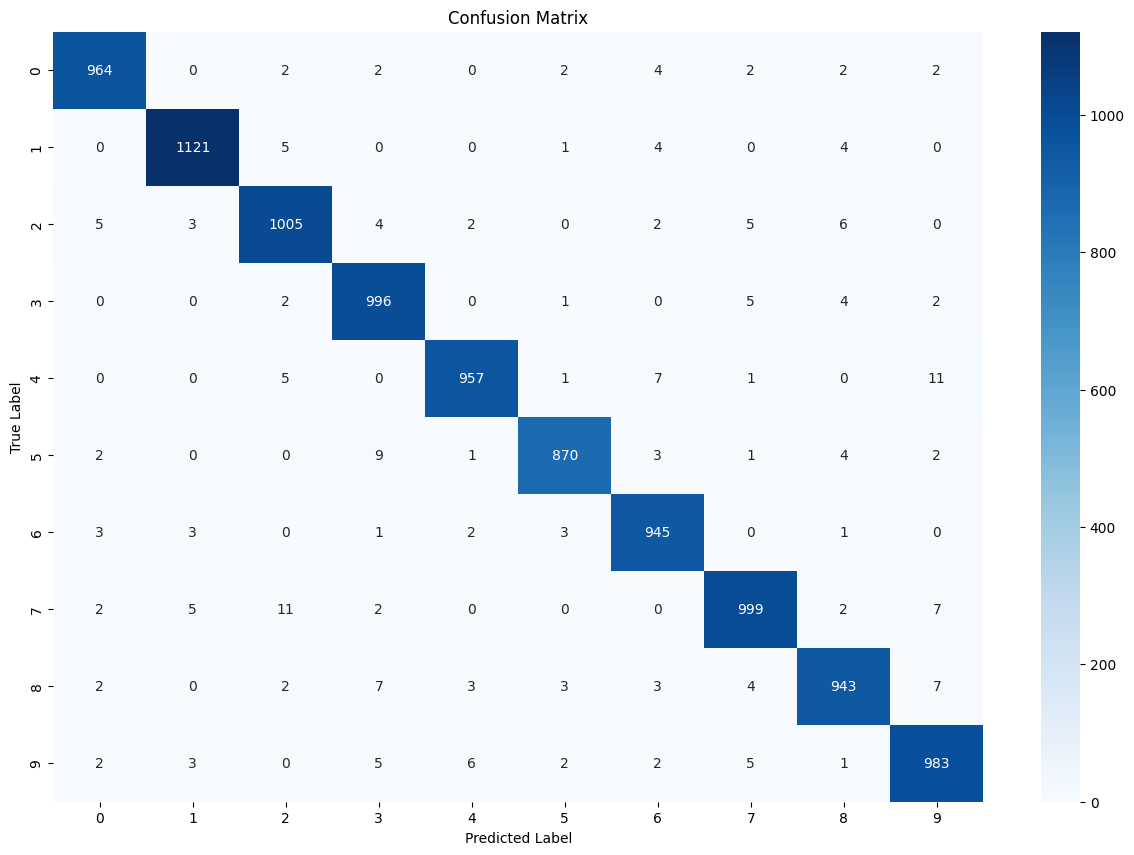

In [18]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


confusion_mtx = confusion_matrix(y_true, y_pred_classes)
#Esto crea una matriz de confusión, que es una tabla que compara las etiquetas reales de un conjunto de datos
#(es decir, las clases a las que pertenecen realmente los datos) con las etiquetas predichas



# Plot   PINTAMO LA MATRIZ EN PANTALLA
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate Some Errors

In [19]:
errors = (y_pred_classes - y_true != 0)
#Supongamos que y_pred_classes=6  y_true=4  por tanto 6-4 es !=0 con lo cual eso da true.  errors = True
#errors es True cuando la predicción del modelo es diferente de la clase real y False cuando la prediccion coincide con la real.
#errors es un array de valores boleanos que compara prediccion vs realidad poniendo true  cuando difieren y false cuando coinciden

y_pred_classes_errors = y_pred_classes[errors]
#y_pred_classes[errors]: Aquí ocurre magia. Esta expresión se conoce como indexación booleana.
#Lo que hace es seleccionar los elementos de y_pred_classes en las posiciones donde errors es True.
#Es decir, está extrayendo las predicciones que fueron incorrectas.
# Ejemplo: Imagina que tenemos:
# y_pred_classes = [0, 1, 2, 1]
# errors = [False, True, True, False]
# Al ejecutar y_pred_classes_errors = y_pred_classes[errors], obtendríamos:
# y_pred_classes_errors = [1, 2]
# Esto nos indica que las predicciones 1 y 2 fueron incorrectas.


y_pred_errors = y_pred[errors]
#recordemos que y_pred es un array DE PROBABILIDADES de ser un 0  o un 1 o un 2..... o un 9
#si al igual que antes le aplicamos la indexacion booleana lo que hace es seleccionar los elementos
#de y_pred en las posiciones donde errors es True.
#Es decir, está extrayendo las predicciones que fueron incorrectas.
#Ejemplo de salida: Supongamos que y_pred_errors[:3] nos da la siguiente salida:
# [[0.1 0.8 0.05 ... 0.02]
#  [0.2 0.1 0.9 ... 0.01]
#  [0.3 0.05 0.02 ... 0.6 ]]
# Esto significa que:
# Para la primera imagen errónea, el modelo tenía una probabilidad del 80% de que fuera un "1" (aunque en realidad era otro dígito).
# Para la segunda imagen errónea, el modelo estaba casi seguro (90%) de que era un "2". (aunque en realidad era otro dígito).
# Para la tercera imagen errónea, el modelo tenía un 60% de confianza en que era un "9". (aunque en realidad era otro dígito).


y_true_errors = y_true[errors]
# Se realiza una indexación booleana sobre y_true. Esto significa que se seleccionan los elementos
#de y_true cuyas posiciones correspondientes en errors son True. En otras palabras, se están extrayendo
#las etiquetas verdaderas de las muestras donde se cometieron errores.

x_test_errors = x_test[errors]
#En x_test[errors] Se realiza una indexación booleana sobre x_test. Esto significa que se seleccionan
#los elementos de x_test cuyas posiciones correspondientes en errors son True. En otras palabras, se están extrayendo
# las imagenes donde el modelo se equivocó.

In [20]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
#Supongamos que y_pred_errors nos diera la siguiente salida:
# [[0.1 0.8 0.05 ... 0.02]
#  [0.2 0.1 0.9 ... 0.01]
#  [0.3 0.05 0.02 ... 0.6 ]]
#al aplicarle np.max(y_pred_errors, axis=1)
#Obtendríamos el siguiente array: [0.8, 0.9, 0.6] que corresponde con los valores maximos de cada fila.
#En resumen obtenemos un nuevo array donde cada elemento representa la probabilidad más alta que el modelo asignó
#a la clase que consideró más probable para cada imagen mal clasificada.

true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
#np.take(y_pred_errors, y_true_errors, axis=1)) esto toma los errores de prediccion y los compara con las etiquetas de las imagenes reales
#funciona asi np.take(listaoarraydelaqueextraerelementos,  indicesquequeremosextraer)  ->devuelve otro array con los elementos extraidos

#np.diagonal: Esta función extrae la diagonal principal de una matriz.
#funciona asi  np.diagonal(matrizdelaqueextraerladiagonal) -> devuelve un nuevo array con los elementos de la diagonal principal

#en definitiva true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1)) esto equivale a un  array con los elementos
#de la diagonal principal de una matriz que esta formada por elementos extraidos de y_pred_errors habiendo extraido los elementos
#que coincide con los indices que se expresan en  y_true_errors
#ENTONCES UN VALOR POSIBLE PARA true_probability_errors PODRIA SER  [0.92, 0.85, 0.77, 0.91, 0.68,..., 0.54, 0.89, 0.72, 0.95, 0.61]


diff_errors_pred_true = y_pred_errors_probability - true_probability_errors
#calcula la diferencia entre las probabilidades predichas y las probabilidades verdaderas para cada muestra.
#por ejemplo podria valer  [0.05, 0.12, -0.03, 0.09, -0.15,...,  0.21, 0.02, -0.11, 0.04, -0.07]
#Valores negativos: Indican que el modelo subestimó la probabilidad de la clase correcta. Es decir, predijo una probabilidad menor
#de lo que realmente debería haber sido.
#Valores positivos: Indican que el modelo sobreestimó la probabilidad de la clase correcta. Es decir, predijo una probabilidad mayor
#de lo que realmente debería haber sido.


# Get list of indices of sorted differences  # Esto ordena el array y genera un nuevo array con los indices que corresponden a la ordenacion.
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
#expliquemos esto con un ejemplo
#suponiendo que diff_errors_pred_true = np.array([3, 1, 4, 1, 5, 9, 2]) ya sabemos que no vale eso... pero es un ejemplo...
#sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
#print(sorted_idx_diff_errors) -># Salida: [1 3 6 0 2 4 5]
#vemos que el indice 1 y el indice 3 corresponde al elemento con valor 1
#vemos que el indice 6 corresponde al elemento con valor 2
#vemos que el indice 0 corresponde al elemento con valor 3
#vemos que el indice 2 corresponde al elemento con valor 4
#vemos que el indice 4 corresponde al elemento con valor 5
#vemos que el indice 5 corresponde al elemento con valor 9


top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones
#esto hace un slicing de sorted_idx_diff_errors  para obtener los 5 ultimos elementos de dicho array

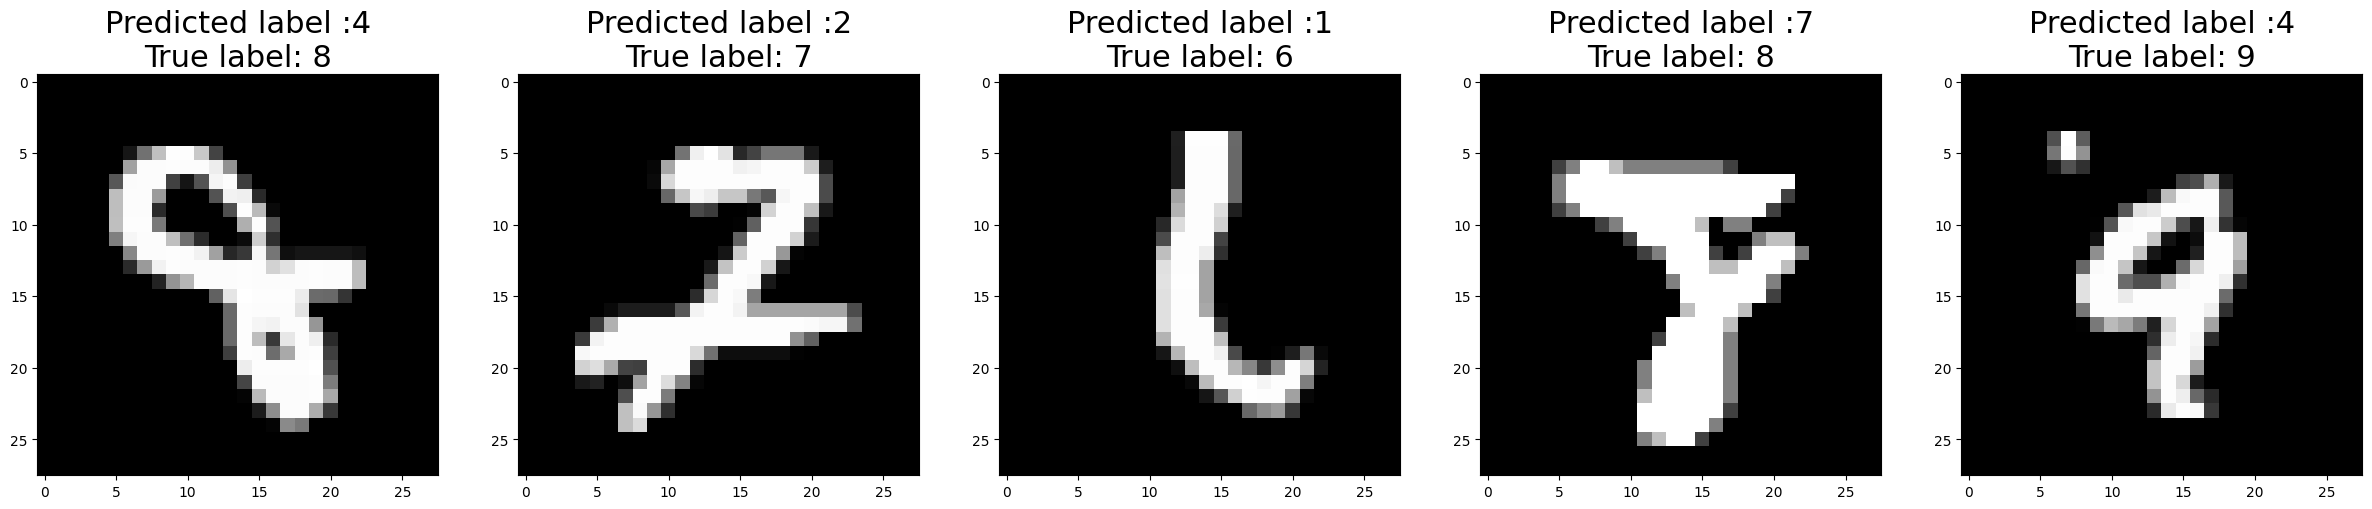

In [21]:
# Show Top Errors
num = len(top_idx_diff_errors)  #num =5 segun la longitud de top_idx_diff_errors
f, ax = plt.subplots(1, num, figsize=(30,30))  #creame 1 fila de subplots con 5 columnas (ya que num=5) con figuras de tamaño 30x30
#f representa la figura completa (Figure object):
#ax ax representa un array de objetos Axes: Cada Axes object es un subplot individual dentro de la figura.


#RECORDEMOS
# diff_errors_pred_true = y_pred_errors_probability - true_probability_errors   -> puede valer [0.05, 0.12, -0.03, 0.09, -0.15,...,  0.21, 0.02, -0.11, 0.04, -0.07]
# sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)  -> puede valer   [4, 8, 2, ..., 9, 0, 3, 7, 1, 5, 6]
#POR TANTO
# top_idx_diff_errors = sorted_idx_diff_errors[-5:]  -> puede valer  [ 3, 7, 1, 5, 6]

for i in range(0, num):
  idx = top_idx_diff_errors[i]   #En nuestro ejemplo en la posicion 0 vale 3  en la 1 vale 3 en la 2 vale 1.....

  sample = x_test_errors[idx].reshape(28,28)
  #recordemos que en x_test_errors se están extrayendo las imagenes donde el modelo se equivocó.
  #se cogera esa imagen donde el modelo se equivoco que se encuentra en el indice almacenado en idx y la va a redimensionar a 28x28

  y_t = y_true_errors[idx]
  #recordemos que y_true_errors contiene las etiquetas verdaderas de las muestras donde se cometieron errores.
  #se cogera el valor de esa etiqueta que se encuentra en el indice almacenado en idx

  y_p = y_pred_classes_errors[idx]
  #recordemos que y_pred_classes_errors contiene las predicciones que fueron incorrectas
  #se cogera el valor de la prediccion que se encuentra en el indice almacenada en idx


  ax[i].imshow(sample, cmap='gray')  #PARA CADA VUELTA DE i (es decir... para cada subplot) muestrame "sample" en escala de grises en pantalla
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)  #y ponle ese titulo.

In [22]:
#Guardamos el modelo
model.save("numeros.h5")